<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285/ILI285 Computación Científica </h1>
    <h1> COP-1 Home</h1>
</center>

Nombre: Francis Vargas Ferrer

Rol: 201573026-1

In [1]:
#importamos librerias
import numpy as np
import matplotlib.pyplot as plt

# Pregunta 1:

#### Considere la siguiente serie:


#### \begin{align}
    \sum_{k=1}^{\infty} k^2 = \frac{\pi^2}{6} = 1.64493406684822643647241516664602518921894990120679843773555822937000 ... \label{eq1}\tag{1}
\end{align}


#### Suponiendo que uno no conoce el valor de la serie y quisiera obtener una estimación de ella. Por ejemplo, uno puede
expandir los términos de la serie de la siguiente forma:


\begin{align}
    \sum_{k=1}^{\infty} k^2 = 1 + \frac{1}{2^2} + \frac{1}{3^2} + \frac{1}{4^2} + ... + \frac{1}{k^2}+ \frac{1}{(k+1)^2} + ... \label{eq2}\tag{2}
\end{align}


#### Notar que podríamos obtener computacionalmente el valor de la serie (2) sumando los términos de izquierda a derecha, i.e. primero se parte con 1, luego se le suma $\frac{1}{2^2}$, y así sucesivamente. A este algoritmo lo denotaremos como Algoritmo 1. La otra forma de obtener una estimación del valor de la serie es realizar la suma de derecha a izquierda, donde claramente no podemos partir desde infinito! Sin embargo podemos truncar la serie hasta el termino K, es decir, hasta el término $\frac{1}{k^2}$, y luego sumar desde ese termino hasta llegar a 1. Aunque claramente esta segunda opción es una aproximación desde el comienzo, evaluaremos su comportamiento. Este será el Algoritmo 2.

## IMPORTANTE:
* Por simplicidad, en esta pregunta se trabajará con single precision, es decir, los números de punto flotante utilizarán 32 bits para su almacenamiento. Recordar que en single precision se utiliza 1 bit para el signo, 23 bits para la mantisa y 8 bits para el exponente.
* En Python 3 cualquier variable se puede almacenar en single precision, para esto se puede utilizar la función de Numpy np.float32().
* Para implementar los algoritmos en single precision se debe hacer casting luego de cada operación, por ejemplo al multiplicar 2 números en single precision y mantener el resultado en single precision uno puede hacer lo siguiente c=np.float32(a*b), otro ejemplo sería elevar un número a a la potencia b: c=np.float32(a**b), y así con todas las operaciones.

## (a)
### En el Algoritmo 1 sabemos que, por como opera la representación de punto flotante, podemos truncar la serie dado que si estamos sumando números positivos la suma será creciente. Esto nos permite concluir que para cierto K, el seguir agregando términos a la suma será en vano, lo único que significará será tiempo extra de computación. Por esto, se le solicita que estime un valor de K donde se asegura que esto ocurrira, i.e. debe obtener un valor de K donde es seguro truncar la suma al estar trabajando en single precision. Usted debe mostrar todo su desarrollo, respuestas sin justificación no reciben puntaje. Hint: This estimation does not have to be tight, but it must be an upper bound of the tight estimation.

El punto en el cual no nos "sirve" continuar añadiendo valores a la sumatoria es cuando $\frac{1}{k^2} < \epsilon_{mach}$.

Calculamos $\epsilon_{mach}$ teniendo en cuenta que single precision almacena 24 bits.

$$
    \epsilon_{mach} = 2^{-24}
$$

Procedemos a calcular el valor de k.

\begin{align}
    \frac{1}{k^2} &< \epsilon_{mach}\\
    \frac{1}{k^2} &< 2^{-24}\\
    k^2 &> 2^{24}\\
    k &> \sqrt{2^{24}}\\
    k &> 4096
\end{align}

Finalmente, cuando nuestro k sea mayor a 2896 no tendrá sentido seguir añadiendo valores a la suma.

## (b)
### Implemente el Algoritmo 1 utilizando single precision (i.e. use np.float32()). Su implementación debe recibir K como input, y el output debe ser un NumPy Array donde el primer término es la aproximación obtenida y el segundo término es el logaritmo en base 10 del valor absoluto del error. El error debe obtenerse respecto a la aproximación entregada en (1). El K a utilizar en esta implementación debe ser el obtenido en la pregunta anterior.

In [2]:
def alg_1(K):
    sum = 0
    val_real = np.float32((np.pi**2)/6)
    for k in range(1,K+1):
        sum = np.float32(sum + np.float32(1/np.float32(k**2)))
    error = abs(val_real - sum)
    sol = np.array([sum, np.log10(error)])
    return sol
alg_1(4096)

array([ 1.6447253, -3.6804037], dtype=float32)

## (c)
### Implemente el Algoritmo 2 utilizando single precision. Su implementación debe recibir K como input, y el output debe ser un NumPy Array donde el primer término es la aproximación obtenida y el segundo término es el logaritmo en base 10 del valor absoluto del error. El error debe obtenerse respecto a la aproximación entregada en (1). El K a utilizar en esta implementación debe ser definido por usted tal que el error obtenido en escala logarítmica (es decir la segunda componente de su output) sea menor que -6 (i.e. $log_{10}(error) < -6$).

In [3]:
def alg_2(K):
    sum = 0
    val_real = np.float32((np.pi**2)/6)
    while(K>0):
        sum = np.float32(sum + np.float32(1/np.float32(K**2)))
        K -= 1
    error = abs(val_real - sum)
    sol = np.array([sum, np.log10(error)])
    return sol
alg_2(1020000)

array([ 1.6449331, -6.0206   ], dtype=float32)

## (d)
### Dado los resultados obtenidos por los 2 algoritmos implementados, ¿Cómo puede explicar lo ocurrido? ¿Qué conclusión/es puede obtener? Asegúrese de responder ambas preguntas.

Al revisar los resultados, notamos que el algoritmo 2 nos permite tener mejores aproximaciones, ya que no tiene como limitante el valor de k y podemos expandir la sumatoria hasta términos mucho más lejanos, esto debido al enfoque que posee este algoritmo. Para explicar lo ocurrido analizaremos ambos métodos:

* Algoritmo 1

Analizando el algoritmo 1 vemos que para valores sobre 4096 no vale la pena seguir desarrollando la sumatoria, esto debido a que se produce perdida de significancia ya que el valor de la suma$>>\frac{1}{4097^2}$, con lo cual el computador desde este término realizara el siguiente calculo:

$$ suma + \sum_{k=4097}^{\infty}\frac{1}{k^2} = suma $$

* Algoritmo 2

El enfoque de el algoritmo 2 evita el problema presentado en el algoritmo 1, ya que siempre suma valores cuyos ordenes de magnitud son cercanos, lo cual nos permite desarrollar la suma hasta el término que queramos (teniendo en cuenta que el menor positivo representable por simple precision es $2^{-149}$).

Se puede concluir que es mucho mejor aplicar un enfoque como el del algoritmo 2 cuando nos enfrentamos a problemas que involucren sumar valores cada vez más pequeños, ya que de esta manera evitamos perdida de significancia y obtenemos mejores aproximaciones.

# Pregunta 3:

### Para mejorar las actividades de entrenamiento del Ejército de las Murallas, la Tropa de Reclutas adquirió una máquina rudimentaria pero que permite calcular raíces de ecuaciones en 1$D$. En particular, quieren simular operaciones básicas del _Equipo de Maniobras Tridimensionales_ ($EDM3D$). Para esto, utilizan la siguiente ecuación que describe la posición del soldado para un instante $t$:
### $$
    r(t) = \alpha + \beta(t)t + \frac{1}{2}\gamma(t)t^2,
$$
### donde $\alpha$ es una constante, y $\beta(t)$ y $\gamma(t)$ son funciones que depende de $t$. Para evitar que los soldados sean alcanzados por un titán, el objetivo de esta máquina es encontrar el tiempo $t_c$ para que la velocidad $v(t)$ sea nula, es decir $v(t_c) = 0$, donde $v(t)$ se obtiene derivando $r(t)$, i.e. $v(t) = r'(t)$.

## (a)
### Obtenga la función $v(t)$. Hint: Don’t forget that $\beta(t)$ and $\gamma(t)$ are functions of $t$.

Para obtener la función $v(t)$ derivamos como se nos indica en el enunciado.

\begin{align}
    v(t) &= r'(t)\\
    v(t) &= \frac{d}{dt}\alpha + \frac{d}{dt}\beta(t)t + \frac{d}{dt}\frac{1}{2}\gamma(t)t^2\\
    v(t) &= 0 + \beta'(t)t + \beta(t) + \frac{1}{2}(\gamma'(t)t^2 + 2\gamma(t)t)\\
    v(t) &= \beta(t) + \beta'(t)t +  \gamma(t)t + \frac{1}{2}\gamma'(t)t^2
\end{align}

## (b) 
### Implemente un algoritmo que obtenga $t_c$ y que tenga convergencia cuadrática en condiciones generales. Su implementación debe recibir como input las siguientes funciones: $\beta(t)$, $\beta'(t)$, $\beta''(t)$, $\gamma(t)$, $\gamma'(t)$, $\gamma''(t)$, el _initial guess_ $t_0$ y el número maximo de iteraciones $n$. El output de su implementación debe ser un vector con las aproximaciones para cada iteración de su algoritmo.

Para poder aplicar el método de Newton-Raphson es necesario obtener $v'(t)$, por lo que la calcularemos manualmente:

\begin{align}
    v'(t) &= \frac{d}{dt}\beta(t) + \frac{d}{dt}(\beta'(t)t) +  \frac{d}{dt}(\gamma(t)t) + \frac{d}{dt}(\frac{1}{2}\gamma'(t)t^2)\\
    v'(t) &= \beta'(t) + \beta''(t)t + \beta'(t) + \gamma'(t)t + \gamma(t) + \frac{1}{2}\gamma''(t)t^2 + \gamma'(t)t\\
    v'(t) &= 2\beta'(t) + \beta''(t)t + \gamma(t) + 2\gamma'(t)t + \frac{1}{2}\gamma''(t)t^2\\
\end{align}

In [4]:
#Usamos la formula entregada en el apunte.
#Usamos newton-raphson por la convergencia cuadratica.
def find_v0(b, b_p, b_pp, y, y_p, y_pp, t_0, n_iter):
    v = lambda t: b(t) + b_p(t)*t + t*y_p(t) + 0.5*(t**2)*y_p(t)
    v_p = lambda t: 2*b_p(t) + b_pp(t)*t + y(t) + 2*y_p(t)*t + 0.5*y_pp(t)*t**2
    roots = np.zeros(n_iter+1)
    roots[0] = t_0
    for i in range(n_iter):
        roots[i+1] = roots[i] - v(roots[i])/v_p(roots[i])
    return roots

## (c)

### 1. Encuentre una raíz de $v(t)$ cercana a $t_0 = 1.5$ para el siguiente input: $\beta(t) = 2 sin(2\pi t) + t^2$, $\gamma(t) = -t$.

In [5]:
b = lambda t: 2*np.sin(2*np.pi*t) + t**2
b_p = lambda t: 2*t + 4*np.pi*np.cos(2*np.pi*t)
b_pp = lambda t: 2-8*(np.pi**2)*np.sin(2*np.pi*t)

y = lambda t: -t
y_p = lambda t: -1
y_pp = lambda t: 0

find_v0(b, b_p, b_pp, y, y_p, y_pp, 1.5, 15)

array([1.5       , 0.78634999, 0.77104501, 0.77089094, 0.77089217,
       0.77089216, 0.77089216, 0.77089216, 0.77089216, 0.77089216,
       0.77089216, 0.77089216, 0.77089216, 0.77089216, 0.77089216,
       0.77089216])

### 2. Muestra en un Tabla o gráficamente los cocientes de los errores: $e_i/e_{i-1}$ y $e_i/e^2_{i-1}$, donde $e_i = |x_i - x_{i+1}|$ y $x_i$ es la aproximación en la i-ésima iteración

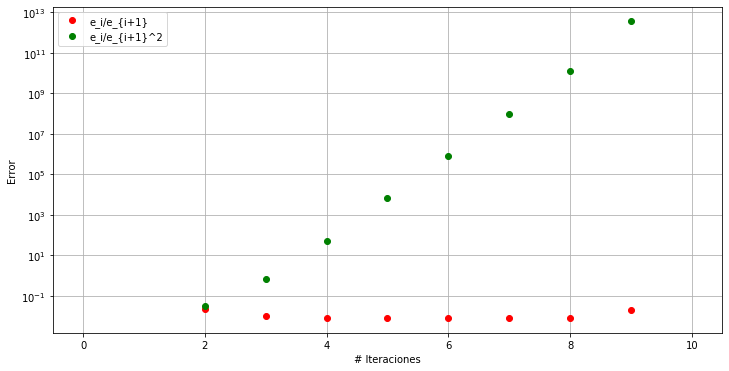

In [6]:
values = find_v0(b, b_p, b_pp, y, y_p, y_pp, 1.5, 20)

error = np.zeros(len(values))
tasa1 = np.zeros(len(error))
tasa2 = np.zeros(len(error))

for i in range(0,len(values)-1):
    error[i+1] = abs(values[i+1]-values[i])
    
for i in range(0,len(tasa1)-1):
    if(error[i] != 0):
        tasa1[i+1] = error[i+1]/error[i]
        tasa2[i+1] = error[i+1]/error[i]**2
    else:
        tasa1[i+1] = np.nan
        tasa2[i+1] = np.nan
    
plt.figure(figsize=(12, 6))
plt.plot(tasa1, 'ro', label="e_i/e_{i+1}")
plt.plot(tasa2, 'go', label="e_i/e_{i+1}^2")
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xlabel("# Iteraciones")
plt.ylabel("Error")
plt.show()

### 3. Analizando la Tabla o gráfico anterior, ¿es efectivamente cuadrática la convergencia o lineal? Justifique.

Al analizar el gráfico nos damos cuenta que la convergencia es lineal, como se puede visualizar(puntos en rojo) la curva del error es lineal, luego su convergencia es lineal.

## (d)

### 1. Encuentre una raíz de $v(t)$ cercana a $t_0 = 2.5$ para el siguiente input: $\beta(t) = 27 - 27t +9t^2 - t^3 $, $\gamma(t) = 0$.

In [7]:
b = lambda t: 27-27*t + 9*t**2 - t**3
b = lambda t: -27 + 18*t - 3*t**2
b = lambda t: 18 - 6*t

y = lambda t: 0
y_p = lambda t: 0
y_pp = lambda t: 0

find_v0(b, b_p, b_pp, y, y_p, y_pp, 2.5, 10)

array([ 2.5       ,  0.92925757,  0.51641771,  1.0236989 , -0.37986509,
        0.2046581 ,  2.64064616,  2.67134773,  2.66965256,  2.6695982 ,
        2.66959668])

### 2. Muestra en un Tabla o gráficamente los cocientes de los errores: $e_i/e_{i-1}$ y $e_i/e^2_{i-1}$, donde $e_i = |x_i - x_{i+1}|$ y $x_i$ es la aproximación en la i-ésima iteración

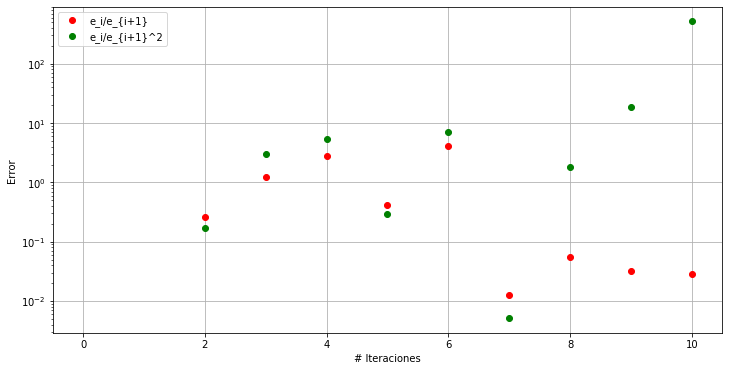

In [8]:
values_2 = find_v0(b, b_p, b_pp, y, y_p, y_pp, 2.5, 12)

error = np.zeros(len(values_2)-1)
tasa1 = np.zeros(len(error)-1)
tasa2 = np.zeros(len(error)-1)

for i in range(len(error)-1):
    error[i+1] = abs(values_2[i]-values_2[i+1])

for i in range(1,len(tasa1)-1):
    if(error[i] != 0):
        tasa1[i+1] = error[i+1]/error[i]
        tasa2[i+1] = error[i+1]/error[i]**2
    else:
        tasa1[i+1] = np.nan
        tasa2[i+1] = np.nan

plt.figure(figsize=(12, 6))
plt.plot(tasa1, 'ro', label="e_i/e_{i+1}")
plt.plot(tasa2, 'go', label="e_i/e_{i+1}^2")
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xlabel("# Iteraciones")
plt.ylabel("Error")
plt.show()

### 3. Analizando la Tabla o gráfico anterior, ¿es efectivamente cuadrática la convergencia o lineal? Justifique.

Observando el gráfico nos damos cuenta de que, al inicio de las iteraciones, ambas tasas caen rápidamente, lo cual parece indicar que existe convergencia cuadrática, si bien más adelante el error asociado a la convergencia cuadrática se dispara, ocurre cuando ya se ha encontrado un cero. Podemos decir entonces que la convergencia es cuadrática.